In [1]:
%%time
import malaya

CPU times: user 11.2 s, sys: 1.38 s, total: 12.6 s
Wall time: 16.1 s


In [2]:
string = 'Benda yg SALAH ni, jgn lah didebatkan. Yg SALAH xkan jadi betul. Ingat tu. Mcm mana kesat sekalipun org sampaikan mesej, dan memang benda tu salah, diam je. Xyah nk tunjuk kau open sangat nk tegur cara org lain berdakwah. '
another_string = 'bodoh, dah la gay, sokong lgbt lagi, memang tak guna'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return classes more than 0.5 probability. **Default is False.**

## Load multinomial model

In [3]:
model = malaya.toxic.multinomial()

In [4]:
model.predict(string)

[]

In [5]:
model.predict(string,get_proba=True)

{'toxic': 0.14165235977019472,
 'severe_toxic': 1.9272487152616215e-06,
 'obscene': 0.011323038998473341,
 'threat': 8.249039905334012e-08,
 'insult': 0.008620760536227347,
 'identity_hate': 4.703244329372946e-06}

In [6]:
model.predict(another_string)

['toxic', 'insult']

In [7]:
model.predict(another_string,get_proba=True)

{'toxic': 0.97624511869432,
 'severe_toxic': 0.0004143925305717536,
 'obscene': 0.48936571876841484,
 'threat': 5.809081616106756e-06,
 'insult': 0.7853970362543069,
 'identity_hate': 0.002109806847753244}

In [8]:
model.predict_batch([string,another_string])

[[], ['toxic', 'insult']]

In [9]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.14165235977019472,
  'severe_toxic': 1.9272487152616215e-06,
  'obscene': 0.011323038998473341,
  'threat': 8.249039905334012e-08,
  'insult': 0.008620760536227347,
  'identity_hate': 4.703244329372946e-06},
 {'toxic': 0.97624511869432,
  'severe_toxic': 0.0004143925305717536,
  'obscene': 0.48936571876841484,
  'threat': 5.809081616106756e-06,
  'insult': 0.7853970362543069,
  'identity_hate': 0.002109806847753244}]

## Load logistics model

In [10]:
model = malaya.toxic.logistic()

In [11]:
model.predict(string)

[]

In [12]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.10299208923447233,
  'severe_toxic': 0.010195223990855215,
  'obscene': 0.04834509566263489,
  'threat': 0.003488478318883341,
  'insult': 0.04528784776538583,
  'identity_hate': 0.011326619000125776},
 {'toxic': 0.6297643126911581,
  'severe_toxic': 0.019551370640497476,
  'obscene': 0.1995748012804703,
  'threat': 0.004014463652898358,
  'insult': 0.3354069432946268,
  'identity_hate': 0.052626041879065236}]

## List available deep learning models

In [13]:
malaya.toxic.available_deep_model()

['bahdanau', 'hierarchical', 'luong', 'fast-text', 'entity-network']

## Load deep learning model

In [14]:
for model in malaya.toxic.available_deep_model():
    print('Testing %s model'%(model))
    deep_model = malaya.toxic.deep_model(model = model)
    print(deep_model.predict(string))
    print(deep_model.predict_batch([string, another_string]))
    print(deep_model.predict_batch([string, another_string],get_proba=True))
    print()

Testing bahdanau model
[]
[[], ['toxic']]
[{'toxic': 0.004403565, 'severe_toxic': 3.365281e-05, 'obscene': 0.0006261515, 'threat': 7.532223e-05, 'insult': 0.00030458395, 'identity_hate': 5.894399e-05}, {'toxic': 0.8340975, 'severe_toxic': 0.0020475034, 'obscene': 0.034258205, 'threat': 0.0003628814, 'insult': 0.0734416, 'identity_hate': 0.0614648}]

Testing hierarchical model
[]
[[], ['toxic']]
[{'toxic': 0.54248875, 'severe_toxic': 0.0065838215, 'obscene': 0.17371807, 'threat': 0.0148023935, 'insult': 0.12660918, 'identity_hate': 0.055212382}, {'toxic': 0.6858065, 'severe_toxic': 0.0032611815, 'obscene': 0.041103873, 'threat': 0.0025343157, 'insult': 0.28004634, 'identity_hate': 0.055198606}]

Testing luong model
[]
[[], ['toxic']]
[{'toxic': 0.13619128, 'severe_toxic': 0.0055254013, 'obscene': 0.032115582, 'threat': 0.017055651, 'insult': 0.039386936, 'identity_hate': 0.012571168}, {'toxic': 0.95763326, 'severe_toxic': 0.018214434, 'obscene': 0.2505002, 'threat': 0.010534671, 'insult

## Unsupervised important words learning

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # i just really like seaborn colors

We need to set `get_proba` become True to get the 'attention'.

#### Visualizing bahdanau model

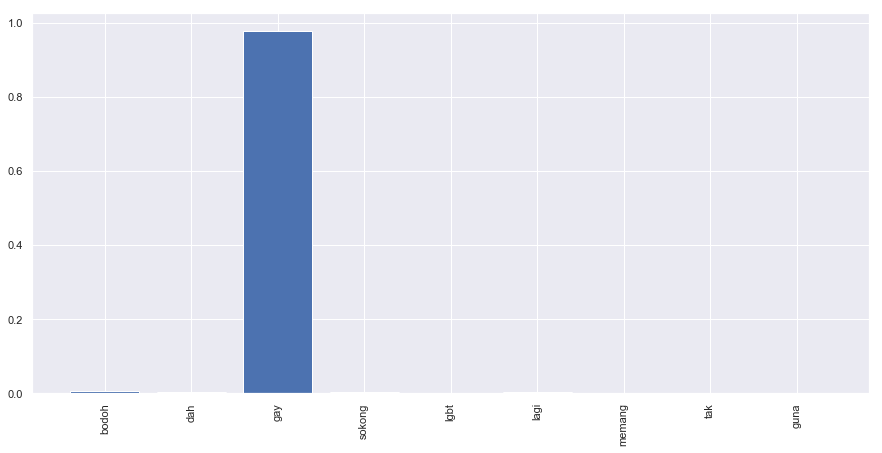

In [16]:
model = malaya.toxic.deep_model('bahdanau')
result = model.predict(another_string,get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing luong model

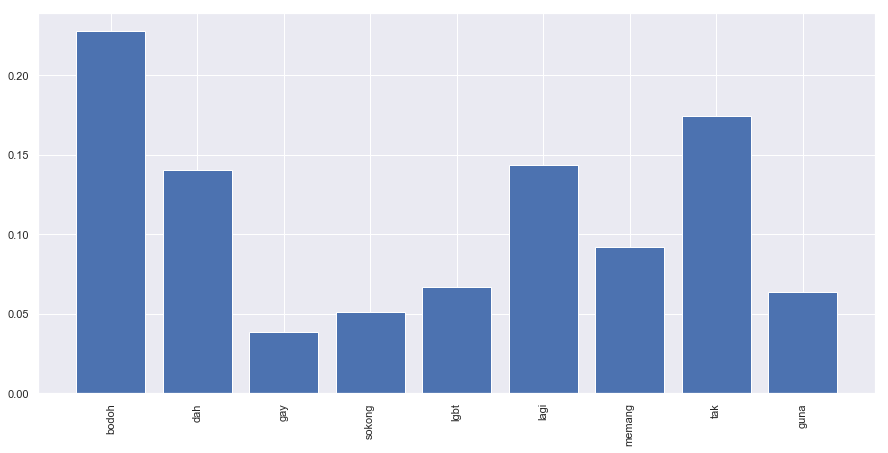

In [17]:
model = malaya.toxic.deep_model('luong')
result = model.predict(another_string,get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing hierarchical model

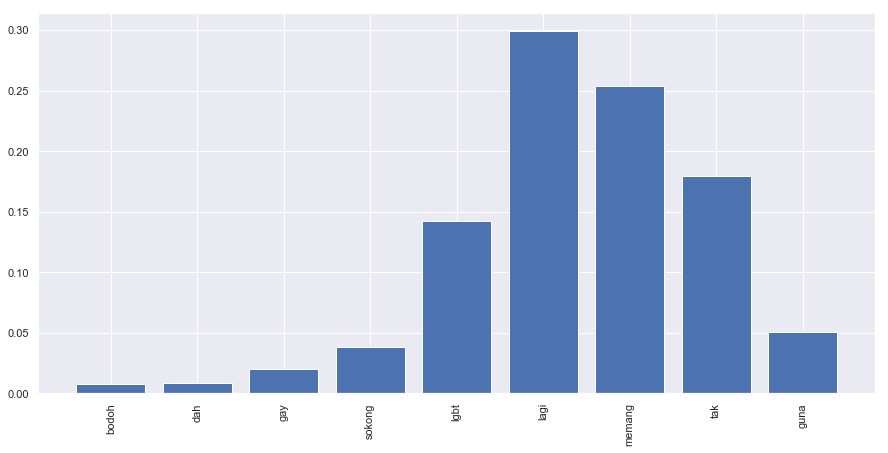

In [18]:
model = malaya.toxic.deep_model('hierarchical')
result = model.predict(another_string,get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()